# ***Péndulo Simple***


> *Integrantes*
>- Alfaro Luna, Luz Yoali
>- De La Cruz Navarro, Emilio Yahir
>- Ramírez Urbieta, Luis Arturo

## Introducción

En la naturaleza, podemos notar como nada es estático por completo, es decir, todo tiene movimiento o todo se mueve; en los tipos de movimientos que existen hay uno característico por "repetir" su recorrido.

Este movimiento es denominado movimiento periódico que se caracteriza porque se repite cíclicamente, y el período de tiempo empleado en cada ciclo es siempre el mismo (o son períodos muy muy muy similares pero hablemos de casos ideales :p).

Un ejemplo de la excepcional importancia del movimiento períodico en la física es el oscilador armónico el cual sirve como modelo para interpretar una variedad de eventos o sistemas.
Dentro de los osciladores armónicos tenemos uno en específico conocido como oscilador armónico simple en el cual tenemos al péndulo simple como uno de ellos.

El péndulo simple se compone de una masa puntual M en el extremo inferior de una cuerda sin masa de longitud L, que gira librmente alrededor de su extremo superior y se mueve en un plano vertical.

<img src= "https://github.com/zaphkieled/Simple-Pendulum/blob/main/BerkeleyDiagramPendulum.jpg?raw=true" height="336" width="336">

Donde se ve que $s = L\theta$ nos relaciona el ángulo que forma la cuerda del péndulo y el eje vertical. Siendo s nuestro desplazamiento angular se puede obtener la velocidad y aceleración.

$v=\frac{ds}{dt}=L\frac{d\theta}{dt}$

 $a=\frac{d^{2}s}{dt^{2}}=L\frac{d^{2}\theta}{dt^{2}}$

Sabemos que existen dos fuerzas que influyen en el péndulo; el peso y la tensión de la cuerda pero podemos despreciar la tensión debido a que no influye en en nuestro movimiento. Al tener la fuerza de la gravedad podemos usar la segunda ley de Newton para obtener una ecuación que describa este movimiento.

$mgsen\theta=-mL\frac{d^{2}\theta}{dt^{2}}$

Nótese que el signo negativo es debido a que la aceleración siempre va en sentido contrario al movimiento.

En esta expresión podemos dividir ambas expresiones entre $mL$ e igualar a cero

$\frac{d^{2}\theta}{dt^{2}} + \frac{g}{L}sen\theta = 0$

Se hace notar que la frecuencia angular está dada por $\omega =\sqrt{\frac{g}{L}}$

$\frac{d^{2}\theta}{dt^{2}} + \omega^{2}sen\theta = 0$


Sabemos que en valores demasiado pequeños para el ángulo obtenemos valores cercanos a cero por lo se puede sustituir el $sen\theta$ como la serie de taylor (en este caso de mclaurin por estar centrada en cero) de la funcion seno de x la cual está determinada por:

$\sum_{n=0}^{\infty}(-1)^{n}\frac{\theta^{2n+1}}{(2n+1)!}$ $\forall \theta$

o también se puede escribir como una manera más fácil:

$sen \theta = \theta - \frac{\theta^3}{3!}+ \frac{\theta^5}{5!}-\frac{\theta^7}{7!}+...$

Con esto podemos aproximarmos de una manera muy precisa al comportamiento del péndulo usando los términos de la serie que uno decida y tomando los valores posteriores como el error de la aproximación. Al reescribir las ecuaciones usando el primer término en una y en la otra los dos primeros términos de la serie obtenemos:

$\frac{d^2 \theta}{dt^2}+\omega^2\theta=0$

$\frac{d^2 \theta}{dt^2}+\omega^2\theta-\frac{\omega^2}{6}\theta^3=0$

Y así obtenemos 3 maneras aproximaciones a una solución del péndulo.

## Código

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

En esta parte se trabaja con las tres ecuaciones a manera definidas como funciones eq1, eq2, eq3 de manera correspondiente a como aparecen a continuación

$\frac{d^2 \theta}{dt^2}+\omega^2sen(\theta)=0$

$\frac{d^2 \theta}{dt^2}+\omega^2\theta-\frac{\omega^2}{6}\theta^3=0$

$\frac{d^2 \theta}{dt^2}+\omega^2\theta=0$

En las funciones definidas se puede observar que piden o llaman el estado inicial y al tiempo, recordemos que $\omega^2= g/l$

Para trabajar con las ecuaciones de segundo se "convirtieron" a ecuaciones de primer orden generando una matriz/vector/arreglo el cual se puede usar en la función para resolver edos como incógnita

$\ddot{\theta}+\omega^2sen(\theta)=0  \Longleftrightarrow \ddot{\theta} = -\omega^2sen(\theta)$

Podemos tomar a la theta y etiquetarlo un poco diferente a:

$ x = \dot{\theta}; \dot{x}=\ddot{\theta}$

así podemos obtener dos ecuaciones nuevas a partir de una misma

$\dot{θ}=x$; $\dot{x} = -\omega^2sen(\theta)$

esto, lo podemos trabajar como vectores $\dot{\vec{y}}$ y $\vec{A}$

$$\begin{bmatrix} \dot{\theta} \\  \dot{x} \end{bmatrix} = \begin{bmatrix} x \\  -\omega^2sen\theta \end{bmatrix}$$

Trabajando de manera similar las otras dos ecuaciones se puede entender el código de estas mismas.

La expresión $\dot{\vec{y}} = \vec{A}$ se puede visualizar como:

$\frac{\vec{y}_{t+\Delta t}-\vec{y}_{t}}{\Delta t} = \vec{A}$

Nos da una manera de visualizar como sería el siguiente punto usando como base la expresión 

$\vec{y}_{t+\Delta t}= \vec{y}_{t} + \vec{A} \Delta t$

Las condiciones iniciales se pueden ingresar en $\vec{y}_{t}$


Aqui se añade que $\vec{y}$  se entiende como:

$$\vec{y}=\begin{bmatrix} \theta \\ x \end{bmatrix} = \begin{bmatrix} \theta \\ \dot{\theta} \end{bmatrix}$$

así es como podemos obtener $\theta$ en función del tiempo.

In [2]:
def eq1(y0,t):  #la funcion toma el vector "y" inicial y el tiempo
  theta, x = y0 
  f = [x,-(g/l) * np.sin(theta)] #[velocidad,edo despejando la derivada de segundo orden]
  return f
  
def eq2(y0,t):
  theta, x = y0
  u = [x,(-(g/l)*theta + ((g/l)*theta**3)/6)]
  return u
  
def eq3(y0,t):
  theta, x = y0
  a = [x,(-(g/l)*theta)]
  return a

En esta parte se designan los parametros de la aceleración de la gravedad, la longitud de la cuerda y el intervalo que se usará para resolver las ecuaciones diferenciales

In [3]:
#parametros
g = 9.81 #aceleración por la gravedad
l = 0.3 #longitud de la cuerda
time = np.linspace(0.0,4.0,200) #intervalo a usar en las ecuaciones

Para el caso de angulos pequeños:     $ \theta = \frac{\pi}{30} = 6°$

Para el caso de ángulos grandes:      $ \theta = \frac{\pi}{2} = 90°$


In [4]:
''' Condiciones iniciales para el caso de ángulos pequeños'''
angulopeque_inicial = 6.0 #en ambos casos, el ángulo se ingresa en grados centigrados
theta0 = np.radians(angulopeque_inicial) #esto los convierte a radianes
x0 = np.radians(0.0) #esta es la velocidad

''' Condiciones iniciales para el caso de ángulos grandes'''
angulogrande_inicial = 90.0 
theta90 = np.radians(angulogrande_inicial)
z0 = np.radians(0.0) #aqui x0 y z0 significan lo mismo, solo es para poder diferenciarlos y asignar variables de manera correcta

La estructura para resolver las EDO usando la funcion odeint es 
`variable asignada = odeint(ecuacion,[condiciones iniciales], intervalo)`.  En sí, la "ecuación" es la función definida donde está la EDO a usar

Las "variables" sol4,sol5 y sol6 implican las mismas ecuaciones diferenciales que sol1,sol2 y sol3 
correspondientemente; se usa estas variables para evitar confusiones, la única diferencia en sí, son las condiciones iniciales.

In [5]:
#soluciones de las ODES usando la función odeint de la libreria scipy.integrate
sol1 = odeint(eq1,[theta0,x0], time)
sol2 = odeint(eq2,[theta0,x0], time)
sol3 = odeint(eq3,[theta0,x0], time)

sol4 = odeint(eq1,[theta90,z0], time)
sol5 = odeint(eq2,[theta90,z0], time)
sol6 = odeint(eq3,[theta90,z0], time)

## Resultados


A manera de resultados se muestran las gráficas obtenidas de la evolución numérica.
Se vuelven a escribir las EDOS aquí en el orden que aparecen en las gráficas:

ODE 1 = $\frac{d^2 \theta}{dt^2}+\omega^2sen(\theta)=0$

ODE 2 = $\frac{d^2 \theta}{dt^2}+\omega^2\theta-\frac{\omega^2}{6}\theta^3=0$

ODE 3 = $\frac{d^2 \theta}{dt^2}+\omega^2\theta=0$

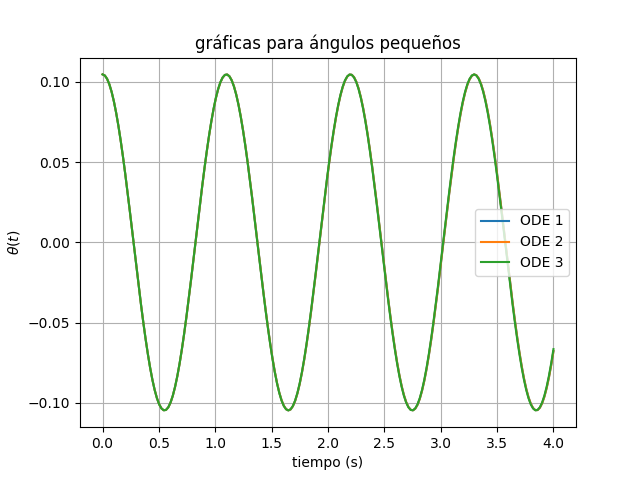

In [9]:
#Gráfica para ángulos pequeños
plt.plot(time,sol1[:,0],label=r'ODE 1') #grafica cada EDO
plt.plot(time,sol2[:,0],label=r'ODE 2')
plt.plot(time,sol3[:,0],label=r'ODE 3')

plt.xlabel('tiempo (s)') #leyenda del eje horizontal
plt.ylabel(r'$\theta(t)$') #leyenda del eje vertical

plt.legend() #el pequeño recuadrito que nos indica que ODE es cada una
plt.title("gráficas para ángulos pequeños") #título de la gráfica
plt.grid(True) #inserta la cuadrícula
plt.show() 

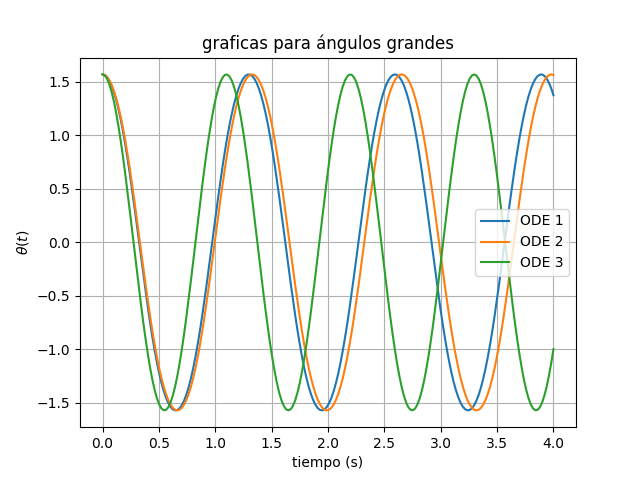

In [7]:
#Gráfica para ángulos grandes
plt.plot(time,sol4[:,0],label=r'ODE 1')
plt.plot(time,sol5[:,0],label=r'ODE 2')
plt.plot(time,sol6[:,0],label=r'ODE 3')

plt.xlabel('tiempo (s)')
plt.ylabel(r'$\theta(t)$')

plt.legend()
plt.title("graficas para ángulos grandes")
plt.grid(True)
plt.show()

## Conclusiones

Hablando de la gráfica de ángulos pequeños, se nota que las 3 ODEs tienen valores "exactos" en el intervalo de tiempo asignado, al contrario que, a primera observación en la gráfica ángulos grandes se puede notar que las gráficas difieren en la frecuencia de cada una de las ODE aunque sean aproximaciones similares. Se puede notar especificamente como la ODE 2 se empieza a distanciar más de las otras ODES, mientras que las 1 y la 3 se mantienen aún cercanas. 

Al aumentar el ángulo, las ecuaciones diferenciales separan más sus soluciones a la posición respecto al tiempo; esto se puede entender debido a que una función tiene un componente periódico; otro un componente lineal y otro uno racional por decirlo de una manera; esto nos da a entender como al evaluar las ecuaciones en valores grandes empieza a haber desviaciones cada vez más grandes (por como opera cada tipo de función mencionada).

Por su otra parte; al reducir el ángulo; se obtienen aproximaciones cada vez más cercanas por que en ángulos pequeños surge que las soluciones se aproximan mucho a 0 (de hecho en los primeros 4 segundos que es donde mostramos la gráfica; se podría decir que tienen la misma frecuencia), dándonos gráficas casi identicas como lo muestra la gráfica para ángulos pequeños, así se puede intuir, analizar y concluir, el cómo un cambio más lento en la frecuencia se obtiene a partir de ángulos pequeños y un cambio más rápido a partir de ángulos grandes.

## Referencias
- C. Kittel, W.D. Knight, M.A. Ruderman, A.C. Helmholz y B.j. Moyer. Berkeley Physics Course, Volumen 1 Mecánica, Editorial Reverté
- D. Halliday, R. Resnick y K.S. Krane, Fundamentos de Física Vol. 1, Editorial Wiley
- J. Stewart, Calculo De Una Variable, Trascendentes tempranas. Editorial Cengage

